<a href="https://colab.research.google.com/github/aliya-ds/Campaign-Effectiveness-Analysis-Attracting-New-Active-Representatives-Case-Simulation-/blob/main/avon_campaigns_analysis_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab caches popular Kaggle datasets and models, eliminating download times and enabling near-instantaneous resource access. For instance, the widely used ["The wildfire dataset"](https://www.kaggle.com/datasets/elmadafri/the-wildfire-dataset) is cached for immediate use.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Colab_Kagglehub_Dataset_Caching.ipynb)

In [7]:
import pandas as pd
import numpy as np

# Установка случайного зерна для воспроизводимости
np.random.seed(42)

# Определение кампаний, регионов и категорий
campaigns = ['N25-01', 'N25-02', 'N25-03', 'N25-04', 'N25-05', 'N25-06']
regions = ['Алматы', 'Астана', 'Юг', 'Север']
categories = ['Декоративная косметика', 'Уходовая косметика', 'Парфюмерия']

# Генерация фейковых данных по продажам и маркетинговым метрикам
data = []
for campaign in campaigns:
    for region in regions:
        for category in categories:
            sales = np.random.randint(4_000_000, 18_000_000)
            units = np.random.randint(1500, 9000)
            new_registered = np.random.randint(300, 700)
            new_active = int(new_registered * np.random.uniform(0.3, 0.5))
            roi = np.random.randint(120, 260)
            avg_check = int(sales / (units + 1))  # +1 чтобы избежать деления на 0
            data.append([campaign, region, category, sales, units, new_registered, new_active, roi, avg_check])

# Создание DataFrame
df = pd.DataFrame(data, columns=[
    "Кампания", "Регион", "Категория", "Продажи (₸)", "Шт.",
    "Новые зарегистрированные", "Новые активные", "ROI (%)", "Средний чек"
])

# Просмотр первых строк таблицы
df.head()

,Кампания,Регион,Категория,Продажи (₸),Шт.,Новые зарегистрированные,Новые активные,ROI (%),Средний чек
0,N25-01,Алматы,Декоративная косметика,10423388,6890,406,185,140,1512
1,N25-01,Алматы,Уходовая косметика,6234489,1966,514,160,207,3169
2,N25-01,Алматы,Парфюмерия,11204212,4671,659,291,172,2398
3,N25-01,Астана,Декоративная косметика,8981505,3891,593,177,140,2307
4,N25-01,Астана,Уходовая косметика,5262752,6055,613,248,208,869


/tmp/ipython-input-2192135715.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_campaign, x="Кампания", y="Продажи (₸)", palette="Blues_d")


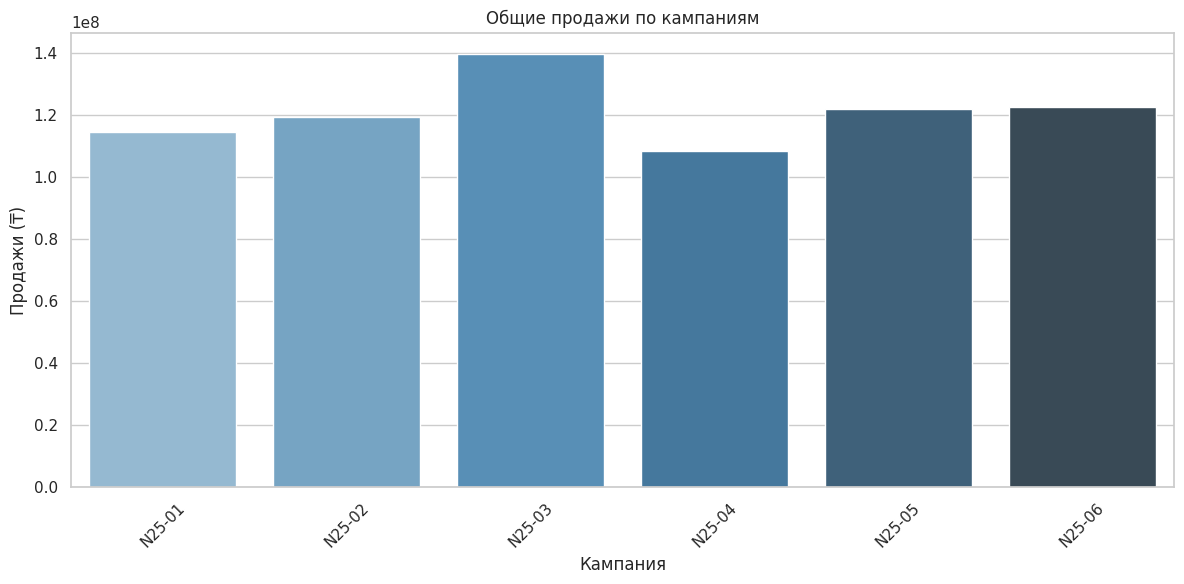

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки графиков
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. 📊 График продаж по кампаниям
sales_by_campaign = df.groupby("Кампания")["Продажи (₸)"].sum().reset_index()
sns.barplot(data=sales_by_campaign, x="Кампания", y="Продажи (₸)", palette="Blues_d")
plt.title("Общие продажи по кампаниям")
plt.ylabel("Продажи (₸)")
plt.xlabel("Кампания")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-632956342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_by_campaign, x="Кампания", y="ROI (%)", palette="Greens_d")


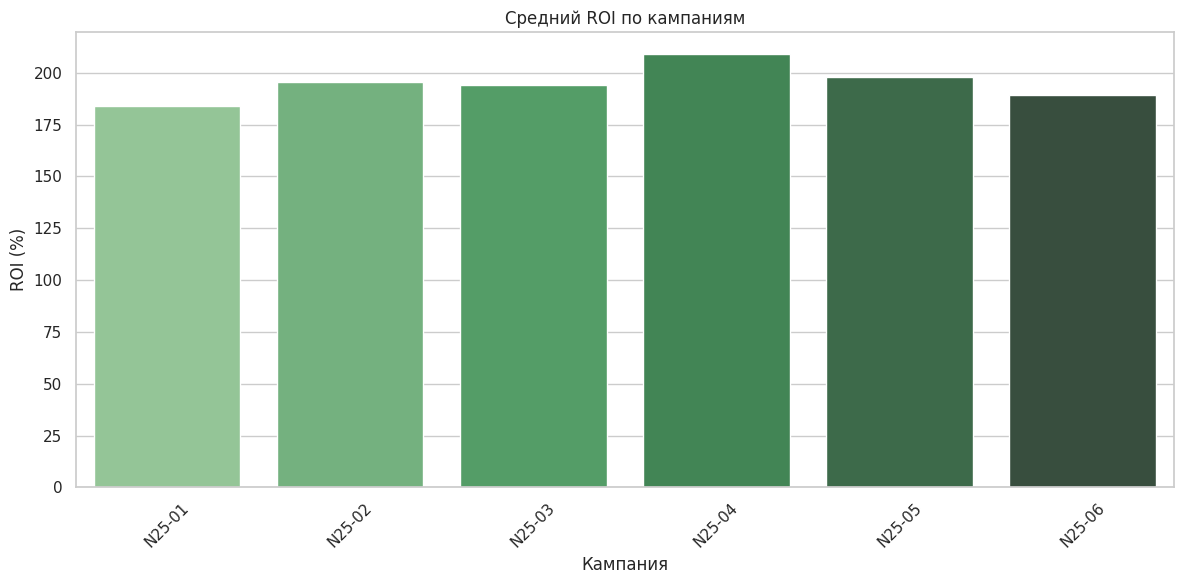

In [9]:
# 2. 📊 ROI по кампаниям (среднее значение)
plt.figure(figsize=(12, 6))
roi_by_campaign = df.groupby("Кампания")["ROI (%)"].mean().reset_index()
sns.barplot(data=roi_by_campaign, x="Кампания", y="ROI (%)", palette="Greens_d")
plt.title("Средний ROI по кампаниям")
plt.ylabel("ROI (%)")
plt.xlabel("Кампания")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1219154682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=active_by_region, x="Регион", y="Новые активные", palette="Oranges_d")


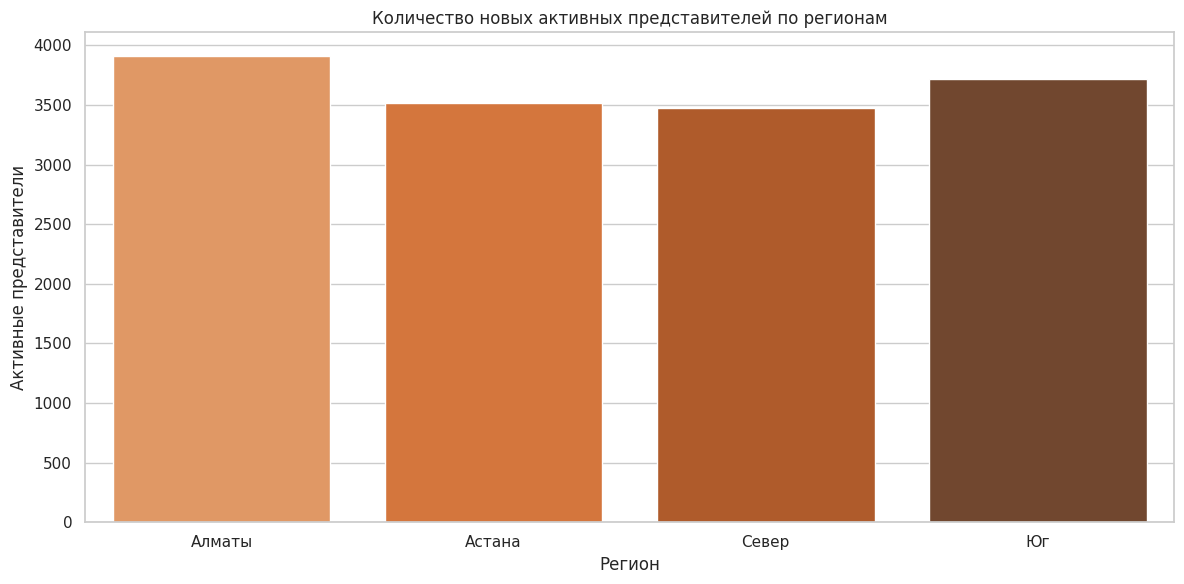

In [10]:
# 3. 📊 Новые активные представители по регионам
plt.figure(figsize=(12, 6))
active_by_region = df.groupby("Регион")["Новые активные"].sum().reset_index()
sns.barplot(data=active_by_region, x="Регион", y="Новые активные", palette="Oranges_d")
plt.title("Количество новых активных представителей по регионам")
plt.ylabel("Активные представители")
plt.xlabel("Регион")
plt.tight_layout()
plt.show()